In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow.keras
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

In [2]:
df = pd.read_csv("Final_News_DF_Labeled_ExamDataset.csv")
print(df.shape)
df

(1493, 301)


,LABEL,according,agency,ahead,alabama,amazon,america,american,announced,appeared,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,politics,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,science,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1489,science,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1490,science,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1491,science,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df = df.sample(frac=1, random_state=60).reset_index(drop=True)
print(df.shape)
print(df['LABEL'].unique())
labelMapping = {'politics':0, 'football':1, 'science':2}
df['LABEL'] = df['LABEL'].map(labelMapping)
print(df['LABEL'].unique())
df

(1493, 301)
['football' 'politics' 'science']
[1 0 2]


,LABEL,according,agency,ahead,alabama,amazon,america,american,announced,appeared,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1490,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1491,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = df['LABEL']
df.drop('LABEL', axis = 1, inplace=True)
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=0.20, random_state=60)

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print(f"The x train shape:{x_train.shape}")
print(f"The x train look like:\n {x_train}")
print(f"The y train shape :{y_train.shape}")
print(f"The y train look like:\n {y_train}")

print("\n\n")

print(f"The x test shape: {x_test.shape}")
print(f"The x test look like:\n {x_test}")
print(f"The y test shape: {y_test.shape}")
print(f"The y test look like: {y_test}")

The x train shape:(1194, 300)
The x train look like:
 [[-0.13380139 -0.08714893 -0.09321671 ... -0.16054032 -0.10075854
  -0.08383552]
 [-0.13380139 -0.08714893 -0.09321671 ... -0.16054032 -0.10075854
  19.93608708]
 [-0.13380139 -0.08714893 -0.09321671 ... -0.16054032 -0.10075854
  -0.08383552]
 ...
 [-0.13380139 -0.08714893 -0.09321671 ... -0.16054032 -0.10075854
  -0.08383552]
 [-0.13380139 -0.08714893 -0.09321671 ... -0.16054032 -0.10075854
  -0.08383552]
 [-0.13380139 -0.08714893 -0.09321671 ... -0.16054032 -0.10075854
  -0.08383552]]
The y train shape :(1194,)
The y train look like:
 [2 2 1 ... 2 0 2]



The x test shape: (299, 300)
The x test look like:
 [[-0.15483088 -0.08206099 -0.05792844 ... -0.21320072 -0.1164445
  -0.08206099]
 [-0.15483088 -0.08206099 -0.05792844 ... -0.21320072 -0.1164445
  -0.08206099]
 [ 6.45865975 -0.08206099 -0.05792844 ... -0.21320072 -0.1164445
  -0.08206099]
 ...
 [-0.15483088 -0.08206099 -0.05792844 ... -0.21320072 -0.1164445
  -0.08206099]
 [-0.

# ANN

In [5]:
ANN_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_dim =x_train.shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3,activation='softmax')
])
ANN_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                19264     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 21443 (83.76 KB)
Trainable params: 21443 (83.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
ANN_model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer="adam"
)
training_records = ANN_model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))


Epoch 1/8


38/38 [==============================] - 1s 9ms/step - loss: 1.4182 - accuracy: 0.3953 - val_loss: 1.0404 - val_accuracy: 0.4482
Epoch 2/8
38/38 [==============================] - 0s 3ms/step - loss: 1.1777 - accuracy: 0.4280 - val_loss: 0.9636 - val_accuracy: 0.4983
Epoch 3/8
38/38 [==============================] - 0s 3ms/step - loss: 1.0193 - accuracy: 0.5084 - val_loss: 0.9202 - val_accuracy: 0.5251
Epoch 4/8
38/38 [==============================] - 0s 3ms/step - loss: 0.9103 - accuracy: 0.5720 - val_loss: 0.8707 - val_accuracy: 0.5853
Epoch 5/8
38/38 [==============================] - 0s 3ms/step - loss: 0.8644 - accuracy: 0.5871 - val_loss: 0.8317 - val_accuracy: 0.6120
Epoch 6/8
38/38 [==============================] - 0s 3ms/step - loss: 0.7912 - accuracy: 0.6290 - val_loss: 0.7931 - val_accuracy: 0.6455
Epoch 7/8
38/38 [==============================] - 0s 3ms/step - loss: 0.7358 - accuracy: 0.6575 - val_loss: 0.7500 - val_accuracy: 0.6722
Epoch 8/8
38/38 [=======

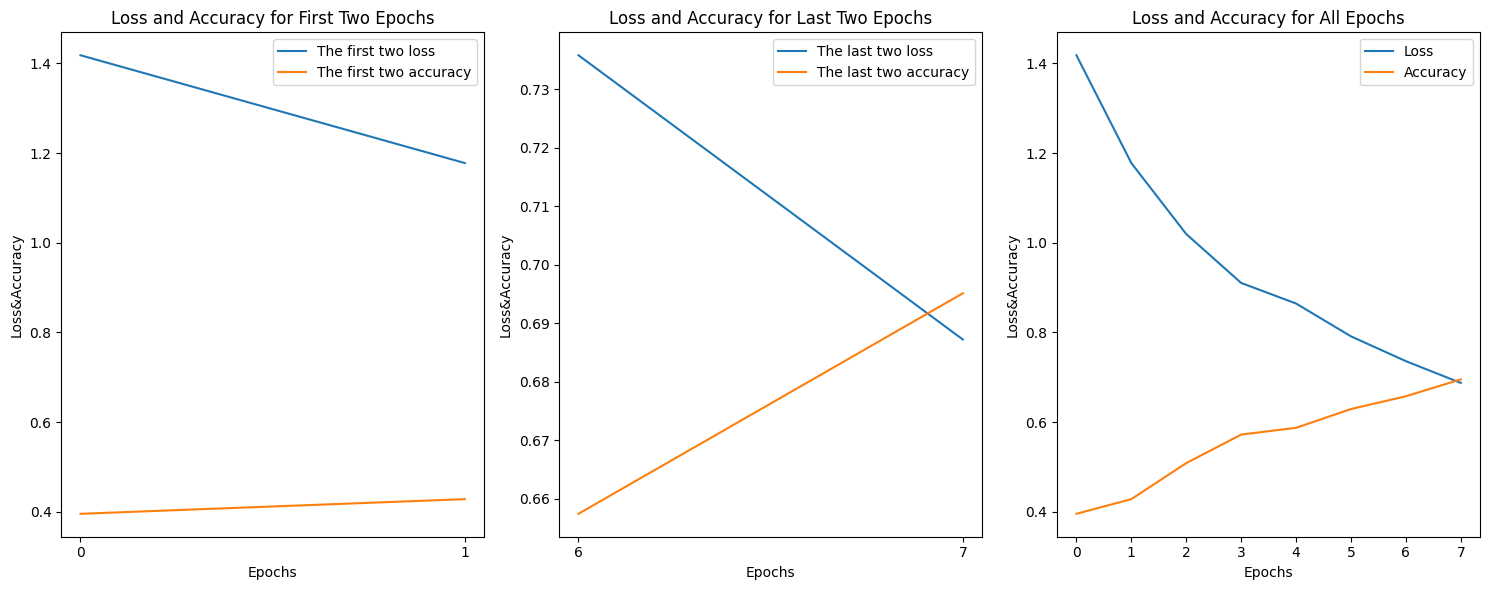

In [7]:
loss = training_records.history['loss']
accuracy = training_records.history['accuracy']

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

axes[0].plot(loss[:2], label="The first two loss")
axes[0].plot(accuracy[:2], label="The first two accuracy")
axes[0].set_title("Loss and Accuracy for First Two Epochs")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss&Accuracy")
axes[0].set_xticks(range(2))
axes[0].legend()

axes[1].plot([6, 7], loss[-2:], label="The last two loss")
axes[1].plot([6, 7], accuracy[-2:], label="The last two accuracy")
axes[1].set_title("Loss and Accuracy for Last Two Epochs")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss&Accuracy")
axes[1].set_xticks([6, 7])
axes[1].legend()

axes[2].plot(loss, label="Loss")
axes[2].plot(accuracy, label="Accuracy")
axes[2].set_title("Loss and Accuracy for All Epochs")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("Loss&Accuracy")
axes[2].set_xticks(range(8))
axes[2].legend()

plt.tight_layout()
plt.show()

In [8]:
test_loss, test_accuracy = ANN_model.evaluate(x_test, y_test)
prediction = ANN_model.predict([x_test])
print(f"Test Accuracy:{test_accuracy}")

10/10 [==============================] - 0s 2ms/step
Test Accuracy:0.6889632344245911


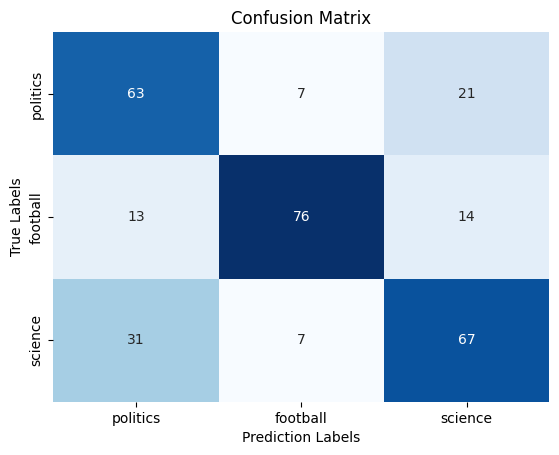

In [9]:
max_value = np.squeeze(np.array(prediction.argmax(axis=1)))
labels = ["politics","football","science"]
cm = confusion_matrix(y_test, max_value)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediction Labels')
plt.ylabel('True Labels')
plt.show()

# CNN

In [27]:
CNN_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(300,1)), 
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
CNN_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 298, 32)           128       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 298, 32)           0         
 g1D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 9536)              0         
                                                                 
 dense_15 (Dense)            (None, 64)                610368    
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                      

In [28]:
CNN_model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer="adam"
)
training_records = CNN_model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))

Epoch 1/8
38/38 [==============================] - 1s 14ms/step - loss: 1.0185 - accuracy: 0.4330 - val_loss: 0.8141 - val_accuracy: 0.7090
Epoch 2/8
38/38 [==============================] - 0s 8ms/step - loss: 0.8204 - accuracy: 0.6030 - val_loss: 0.6727 - val_accuracy: 0.7224
Epoch 3/8
38/38 [==============================] - 0s 8ms/step - loss: 0.7138 - accuracy: 0.6809 - val_loss: 0.6294 - val_accuracy: 0.7525
Epoch 4/8
38/38 [==============================] - 0s 8ms/step - loss: 0.6315 - accuracy: 0.7328 - val_loss: 0.6513 - val_accuracy: 0.7391
Epoch 5/8
38/38 [==============================] - 0s 8ms/step - loss: 0.5738 - accuracy: 0.7546 - val_loss: 0.6628 - val_accuracy: 0.7425
Epoch 6/8
38/38 [==============================] - 0s 8ms/step - loss: 0.5096 - accuracy: 0.7940 - val_loss: 0.6650 - val_accuracy: 0.7659
Epoch 7/8
38/38 [==============================] - 0s 8ms/step - loss: 0.5059 - accuracy: 0.7965 - val_loss: 0.7015 - val_accuracy: 0.7525
Epoch 8/8
38/38 [=========

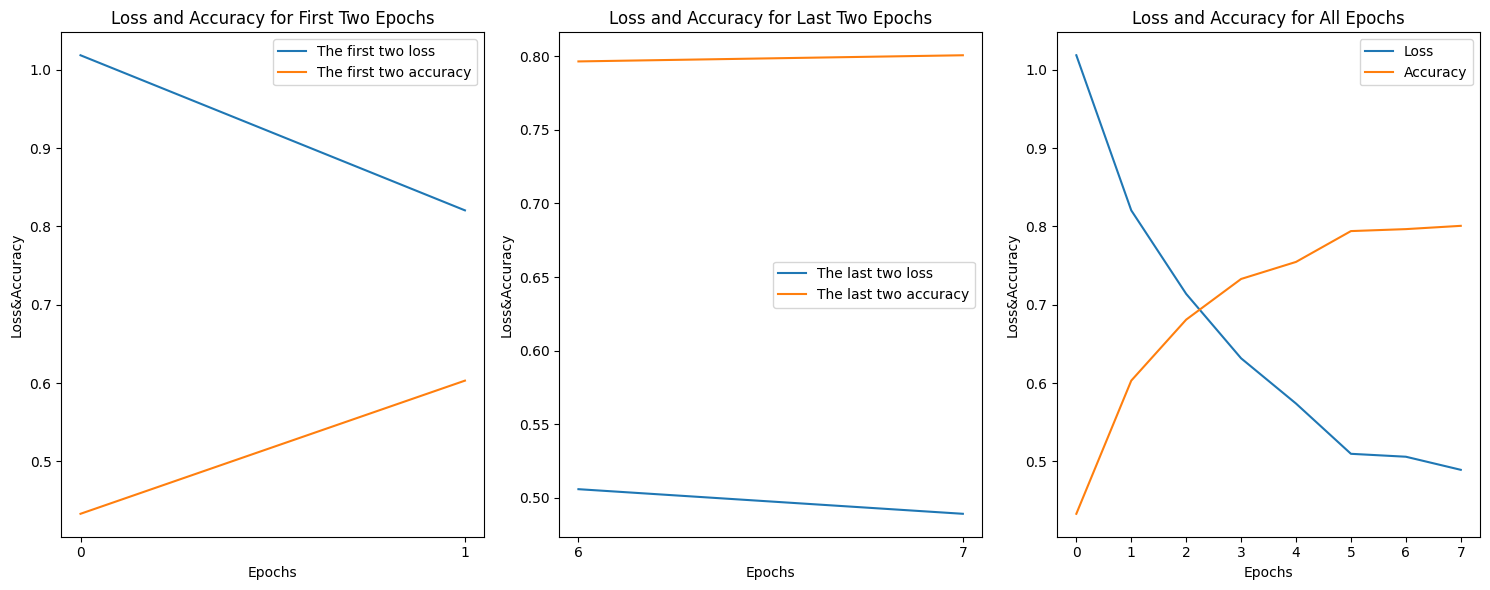

In [29]:
loss = training_records.history['loss']
accuracy = training_records.history['accuracy']

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

axes[0].plot(loss[:2], label="The first two loss")
axes[0].plot(accuracy[:2], label="The first two accuracy")
axes[0].set_title("Loss and Accuracy for First Two Epochs")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss&Accuracy")
axes[0].set_xticks(range(2))
axes[0].legend()

axes[1].plot([6, 7], loss[-2:], label="The last two loss")
axes[1].plot([6, 7], accuracy[-2:], label="The last two accuracy")
axes[1].set_title("Loss and Accuracy for Last Two Epochs")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss&Accuracy")
axes[1].set_xticks([6, 7])
axes[1].legend()

axes[2].plot(loss, label="Loss")
axes[2].plot(accuracy, label="Accuracy")
axes[2].set_title("Loss and Accuracy for All Epochs")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("Loss&Accuracy")
axes[2].set_xticks(range(8))
axes[2].legend()

plt.tight_layout()
plt.show()

In [30]:
test_loss, test_accuracy = CNN_model.evaluate(x_test, y_test)
prediction = CNN_model.predict([x_test])
print(f"The Test accuracy: {test_accuracy}")

10/10 [==============================] - 0s 3ms/step
The Test accuracy: 0.7525083422660828


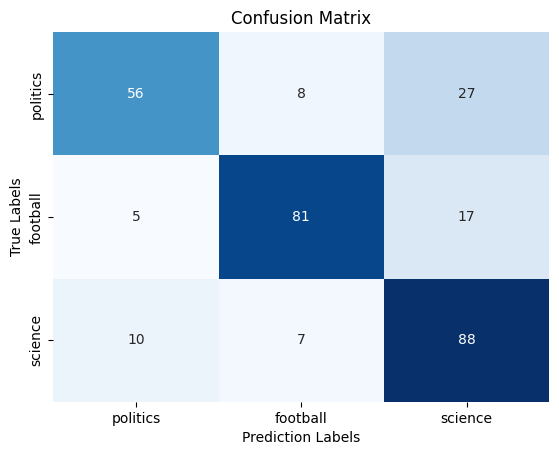

In [31]:
max_value = np.squeeze(np.array(prediction.argmax(axis=1)))
labels = ["politics","football","science"]
cm = confusion_matrix(y_test, max_value)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediction Labels')
plt.ylabel('True Labels')
plt.show()

# LSTM

In [32]:
x_train_reshape = x_train.reshape((x_train.shape[0],1,300))
x_test_reshape = x_test.reshape((x_test.shape[0],1,300))
print(x_train_reshape.shape)
print(x_test_reshape.shape)

(1194, 1, 300)
(299, 1, 300)


In [37]:
LSTM_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape =(1,300)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3,activation='softmax')
])
LSTM_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               219648    
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 3)                 99        
                                                                 
Total params: 230083 (898.76 KB)
Trainable params: 230

In [38]:
LSTM_model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer="adam"
)
LSTM_training_records = LSTM_model.fit(x_train_reshape, y_train, epochs=8, validation_data=(x_test_reshape, y_test))

Epoch 1/8
38/38 [==============================] - 3s 16ms/step - loss: 1.0683 - accuracy: 0.3861 - val_loss: 0.9865 - val_accuracy: 0.5987
Epoch 2/8
38/38 [==============================] - 0s 5ms/step - loss: 0.9361 - accuracy: 0.5444 - val_loss: 0.8742 - val_accuracy: 0.7057
Epoch 3/8
38/38 [==============================] - 0s 5ms/step - loss: 0.7581 - accuracy: 0.6935 - val_loss: 0.7157 - val_accuracy: 0.7425
Epoch 4/8
38/38 [==============================] - 0s 5ms/step - loss: 0.5888 - accuracy: 0.7638 - val_loss: 0.6461 - val_accuracy: 0.7324
Epoch 5/8
38/38 [==============================] - 0s 5ms/step - loss: 0.4579 - accuracy: 0.8233 - val_loss: 0.6636 - val_accuracy: 0.7391
Epoch 6/8
38/38 [==============================] - 0s 4ms/step - loss: 0.3870 - accuracy: 0.8559 - val_loss: 0.7099 - val_accuracy: 0.7391
Epoch 7/8
38/38 [==============================] - 0s 5ms/step - loss: 0.3084 - accuracy: 0.8735 - val_loss: 0.8024 - val_accuracy: 0.7291
Epoch 8/8
38/38 [=========

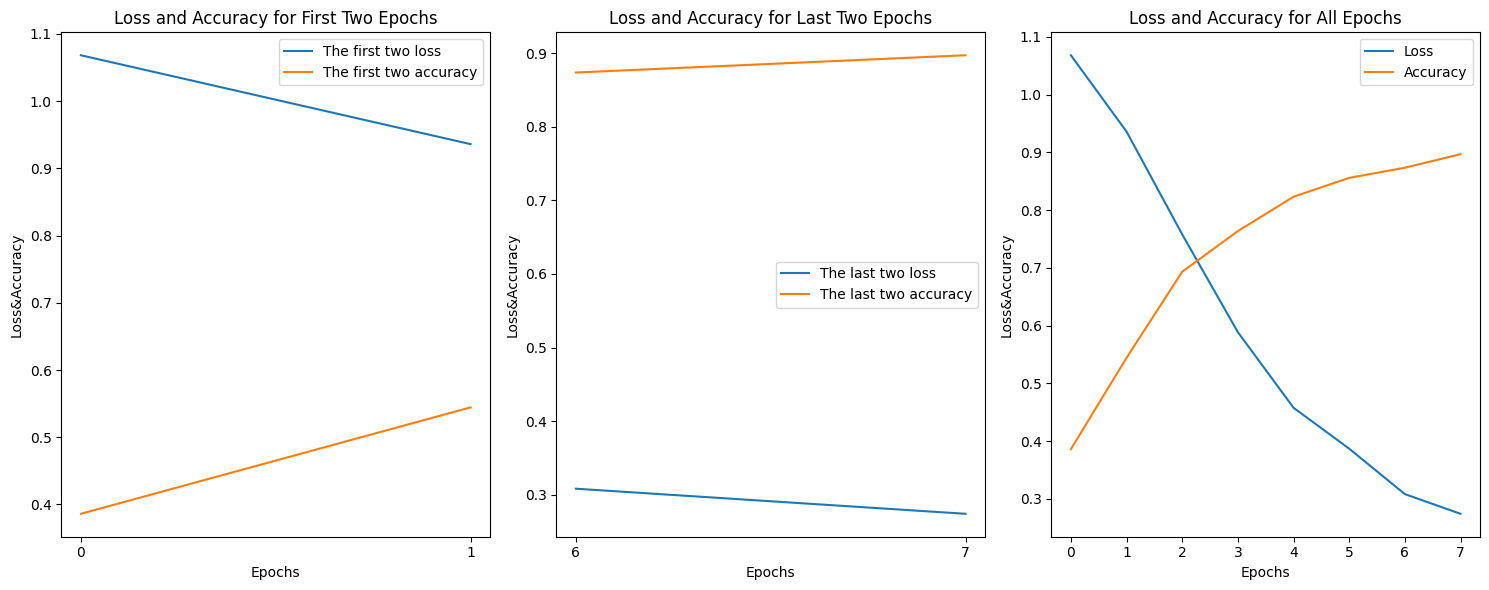

In [39]:
loss = LSTM_training_records.history['loss']
accuracy = LSTM_training_records.history['accuracy']

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

axes[0].plot(loss[:2], label="The first two loss")
axes[0].plot(accuracy[:2], label="The first two accuracy")
axes[0].set_title("Loss and Accuracy for First Two Epochs")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss&Accuracy")
axes[0].set_xticks(range(2))
axes[0].legend()

axes[1].plot([6, 7], loss[-2:], label="The last two loss")
axes[1].plot([6, 7], accuracy[-2:], label="The last two accuracy")
axes[1].set_title("Loss and Accuracy for Last Two Epochs")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss&Accuracy")
axes[1].set_xticks([6, 7])
axes[1].legend()

axes[2].plot(loss, label="Loss")
axes[2].plot(accuracy, label="Accuracy")
axes[2].set_title("Loss and Accuracy for All Epochs")
axes[2].set_xlabel("Epochs")
axes[2].set_ylabel("Loss&Accuracy")
axes[2].set_xticks(range(8))
axes[2].legend()

plt.tight_layout()
plt.show()

In [40]:
test_loss, test_accuracy = LSTM_model.evaluate(x_test_reshape, y_test)
prediction = LSTM_model.predict([x_test_reshape])
print(f"The Test accuracy: {test_accuracy}")

10/10 [==============================] - 0s 2ms/step
The Test accuracy: 0.7123745679855347


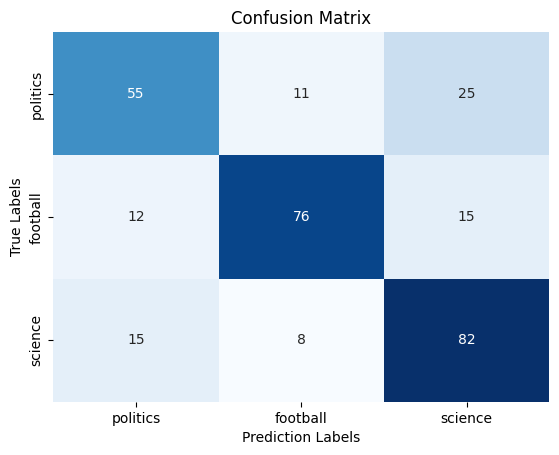

In [41]:
max_value = np.squeeze(np.array(prediction.argmax(axis=1)))
labels = ["politics","football","science"]
cm = confusion_matrix(y_test, max_value)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediction Labels')
plt.ylabel('True Labels')
plt.show()

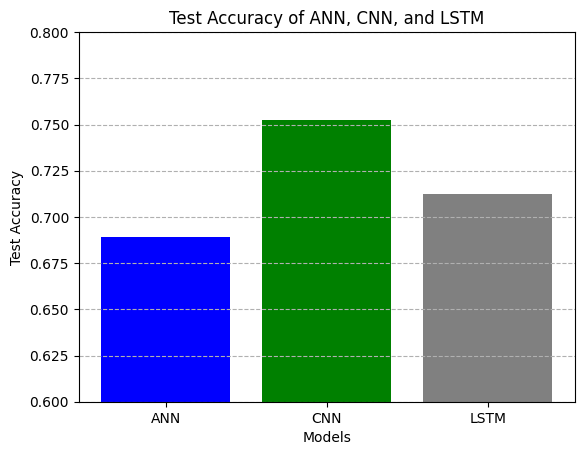

In [48]:
data = {
    "models": ["ANN", "CNN", "LSTM"],
    "Test_Accuracy":[0.68896,0.752508,0.71237]
}
accuracy_df = pd.DataFrame(data)
accuracy_df

plt.bar(accuracy_df['models'], accuracy_df['Test_Accuracy'], color=['blue', 'green', 'gray'])
plt.title('Test Accuracy of ANN, CNN, and LSTM')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.ylim(0.6, 0.8)
plt.grid(axis='y', linestyle='--')
plt.show()